<a href="https://colab.research.google.com/github/Zuzed22/Machine-Learning/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [134]:
import pandas as pd

In [135]:
datos = pd.read_csv('/content/prestacar.csv')

In [136]:
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [137]:
X = datos.drop(columns='moroso', axis=1)
y = datos.moroso

In [138]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [139]:
print(f'La exactitud del modelo es de {modelo.score(X, y)}')

La exactitud del modelo es de 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X,X_test,y,y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X, y, stratify=y, random_state=5)

In [142]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validación es de: 0.8483581569549691


In [143]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206155632984901
La exactitud del modelo con el conjunto de validación es de: 0.9055831373573731


### Evaluando el modelo

In [144]:
from sklearn.metrics import confusion_matrix

In [145]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[10353   126]
 [  958    44]]


In [146]:
from sklearn.metrics import ConfusionMatrixDisplay

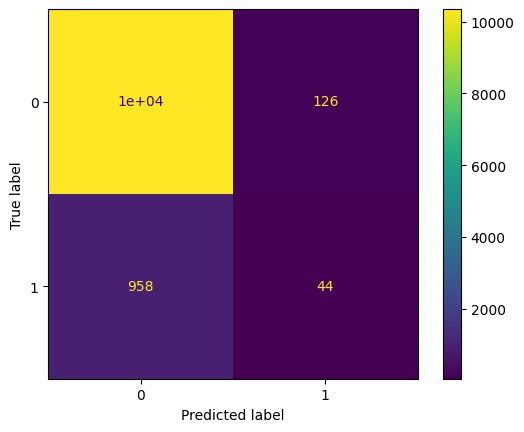

In [147]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion)
visualizacion.plot();

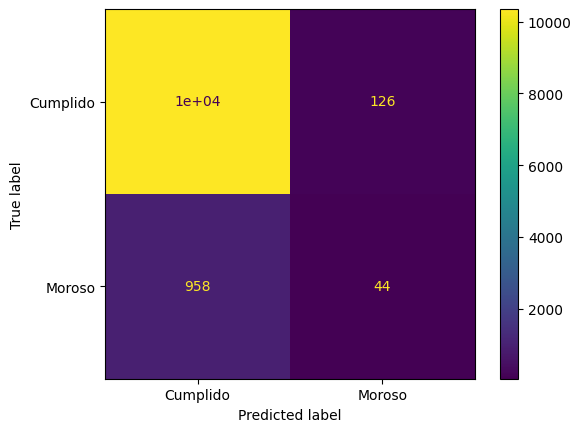

In [148]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion, display_labels= ['Cumplido', 'Moroso'])
visualizacion.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [150]:
45/(45+123) #precision

0.26785714285714285

In [151]:
print(f'La presición del modelo es de: {precision_score(y_val, y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es de: {recall_score(y_val, y_previsto)}')
print(f'La exactitud (accuracy) del modelo es de: {accuracy_score(y_val, y_previsto)}')

La presición del modelo es de: 0.25882352941176473
La sensibilidad (Recall) del modelo es de: 0.043912175648702596
La exactitud (accuracy) del modelo es de: 0.9055831373573731


In [152]:
print(f'La F1-score del modelo es de: {f1_score(y_val, y_previsto)}')

La F1-score del modelo es de: 0.07508532423208192


### Curva ROC

In [153]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [154]:
from sklearn.metrics import RocCurveDisplay

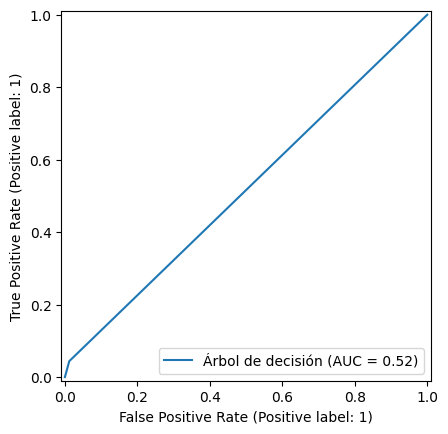

In [155]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name= 'Árbol de decisión');

In [156]:
from sklearn.metrics import roc_auc_score

In [157]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val, y_previsto)}')

El área bajo la curva ROC es: 0.5159440637762551


### Curva de  precisión x sensibilidad

In [158]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [159]:
from sklearn.metrics import PrecisionRecallDisplay

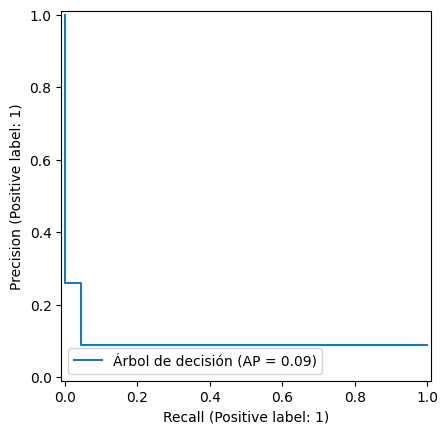

In [160]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name= 'Árbol de decisión')

In [161]:
from sklearn.metrics import average_precision_score

In [162]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val, y_previsto)}')

El score promedio de precisión vs recall es: 0.09480771315237001


### Informe de métricas

In [163]:
from sklearn.metrics import classification_report

In [164]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.08      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [165]:
from sklearn.model_selection import KFold, cross_validate

In [166]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.31305742, 0.30159187, 0.31023383, 0.31292605, 0.31114888]),
 'score_time': array([0.00482178, 0.00447154, 0.00427866, 0.00438452, 0.00456285]),
 'test_score': array([0.91290147, 0.90777439, 0.90766551, 0.91321864, 0.89917247])}

In [167]:
cv_resultados['test_score']

array([0.91290147, 0.90777439, 0.90766551, 0.91321864, 0.89917247])

In [168]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es : [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.9081464960481318
El desvío típico es de: 0.005084079461218977
El intervalo de confianza es : [0.8979783371256939,0.9183146549705697]


### Validación cruzada con sensibilidad

In [169]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es : [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [170]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring= 'recall')
cv_resultados

{'fit_time': array([0.31718826, 0.22426128, 0.23579836, 0.23121142, 0.22582746]),
 'score_time': array([0.00567937, 0.00677061, 0.0060091 , 0.00561285, 0.00545526]),
 'test_score': array([0.02906209, 0.0210396 , 0.0196802 , 0.0156658 , 0.02427746])}

In [171]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es : [0.012935222059937893,0.0309548343163309]'

In [172]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.22294283, 0.22822762, 0.22212434, 0.22172809, 0.22162271]),
 'score_time': array([0.01183462, 0.01628566, 0.01423359, 0.01123786, 0.01170111]),
 'test_accuracy': array([0.91311922, 0.90712108, 0.90755662, 0.91332753, 0.89960801]),
 'test_recall': array([0.02906209, 0.01980198, 0.0196802 , 0.01436031, 0.02427746]),
 'test_precision': array([0.25882353, 0.20779221, 0.23529412, 0.21153846, 0.21212121]),
 'test_f1': array([0.05225653, 0.03615819, 0.03632236, 0.02689487, 0.04356846])}

In [173]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [174]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.8981115074745497, 0.9181814751379888]
Intervalo de confianza(test_recall): [0.011555140171895554, 0.031317673487934496]
Intervalo de confianza(test_precision): [0.18619738545585027, 0.26403042594843174]
Intervalo de confianza(test_f1): [0.02210778534711762, 0.055972380799413815]


### Estratificando los datos

In [175]:
datos['moroso'].value_counts(normalize=True)

,proportion
moroso,
0,0.912707
1,0.087293


In [176]:
from sklearn.model_selection import StratifiedKFold

In [177]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring= 'recall')

In [178]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es : [0.021310525418528785,0.03406352385279975]'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [179]:
from imblearn.over_sampling import SMOTE

In [180]:
over_sampling = SMOTE()
x_balanceada, y_balanceada = over_sampling.fit_resample(X, y)

In [181]:
y_balanceada.value_counts(normalize= True)

,proportion
moroso,
0,0.5
1,0.5


In [182]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceada, y_balanceada, cv=skf, scoring= 'recall')

In [183]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es : [0.7289842179961873,0.7622363109440989]'

### Otros métodos de balanceo

Utilizando el algoritmo SMOTEENN, que combina el oversampling con SMOTE y el undersampling con el ENN (Edited Nearest Neighbours), para balancear los datos y observar los resultados obtenidos por el modelo usando el pipeline y la validación cruzada.

*Documentación del método SMOTEENN a partir de este enlace: https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html para identificar cómo importar el método y cómo utilizarlo.*

In [184]:
from imblearn.combine import SMOTEENN

In [185]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo)])

In [186]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')

In [187]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es : [0.27893413579099996,0.473897891506549]'

### Pipeline para validación

In [188]:
from imblearn.pipeline import Pipeline as imbpipeline

In [189]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()),('arbol', modelo)])

In [190]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring= 'recall')

In [191]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es : [0.19093170834847006,0.27003759124897825]'

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [192]:
from imblearn.under_sampling import NearMiss

In [193]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version= 3)),('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring= 'recall')

In [194]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es : [0.6156914986958805,0.7023237005096014]'

### Probando el modelo

In [195]:
undersample = NearMiss(version= 3)
x_balanceada, y_balanceada = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



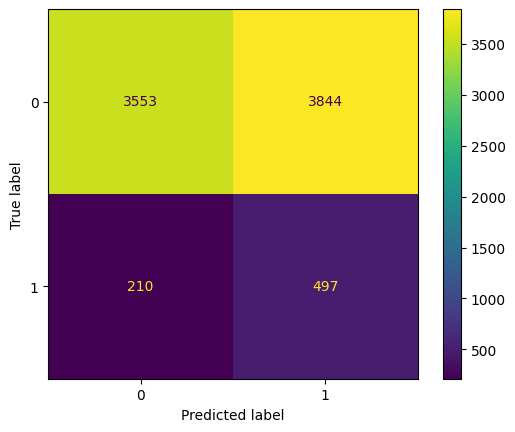

In [196]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada, y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

***El objetivo principal es priorizar la métrica de Recall para identificar de forma más efectiva a los clientes morosos y evitar pérdidas financieras. El modelo final logra predecir correctamente 496 casos de clientes morosos, con un Recall del 70%. Sin embargo, se sacrifica la precisión, que queda en un 11%.***

La idea de la empresa era dejar de perder dinero con clientes morosos porque no los estaban identificando correctamente. Ahora, están identificando correctamente a los clientes morosos, pero a cambio, podrían terminar prediciendo que clientes que son posiblemente buenos pagadores sean morosos. Por eso, estoy teniendo esta cantidad de falsos positivos.

Para la empresa, esto representa lógicamente un riesgo que va a asumir. La idea es que no vamos a prestar a tantas personas, ¿verdad? No vamos a financiar a tantas personas, pero a cambio, nos aseguraremos de identificar a los morosos antes de conocer las características de estos clientes morosos antes de prestarles. Vamos a proceder con pasos un poco más seguros aquí, trabajando con este modelo de Machine Learning (Aprendizaje Automático) para identificar a clientes morosos.